<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Logistic_regression_polynomial_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('/content/ushape.csv')

In [71]:
df

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [72]:
feature_name = ['x','y','output']
df.columns = feature_name

In [73]:
df

,x,y,output
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [74]:
df.head()

,x,y,output
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [75]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [76]:
x

array([[ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,  0.17247329],
       [ 1.4834364 ,

In [77]:
y

array([1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

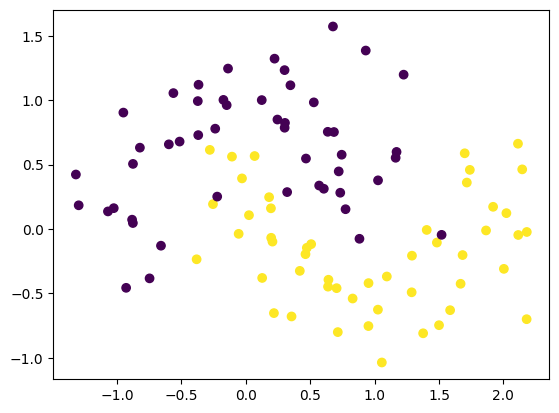

In [78]:
plt.scatter(x[:,0],x[:,1],c= y)

In [79]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

lor.fit(x,y)

LogisticRegression()

<Axes: >

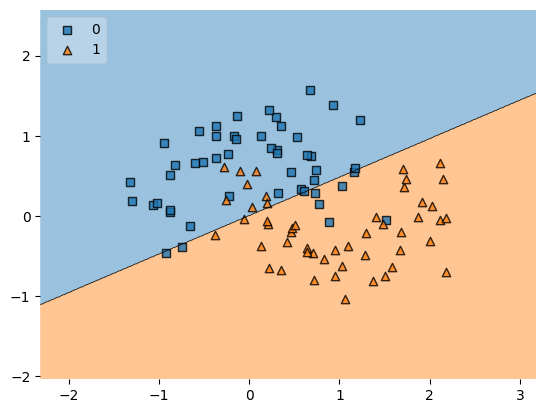

In [80]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),lor,legend=2)

In [81]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lor,x,y,scoring = 'accuracy',cv = 10))

np.float64(0.8300000000000001)

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3 , include_bias = False)
x_trf = poly.fit_transform(x)

In [83]:
lor1 = LogisticRegression()
np.mean(cross_val_score(lor1,x_trf,y,scoring="accuracy",cv = 10))

np.float64(0.9099999999999999)

In [84]:
def plot_decision_regions(x,y,degree =1 ):
  poly = PolynomialFeatures(degree = degree)
  x_trf = poly.fit_transform(x)

  clf = LogisticRegression()
  clf.fit(x_trf,y)

  accuracy = np.mean(cross_val_score(clf,x_trf,y,scoring = 'accuracy',cv = 10))

  a = np.arange(start= x[:,0].min()-1 , stop = x[:,1].max()+1, step = .01)
  b = np.arange(start = x[:,1].min()-1, stop = x[:,1].max()+1 , step = .01)

  xx,yy = np.meshgrid(a,b)

  input_array = np.array([xx.ravel(),yy.ravel()]).T
  labels = clf.predict(poly.transform(input_array))

  plt.contour(xx,yy,labels.reshape(xx.shape),alpha = .75)
  plt.scatter(x[:,0],x[:,1],c= y)
  plt.title("Degree = {} , accuracy is = {}".format(degree,np.round(accuracy,4)))

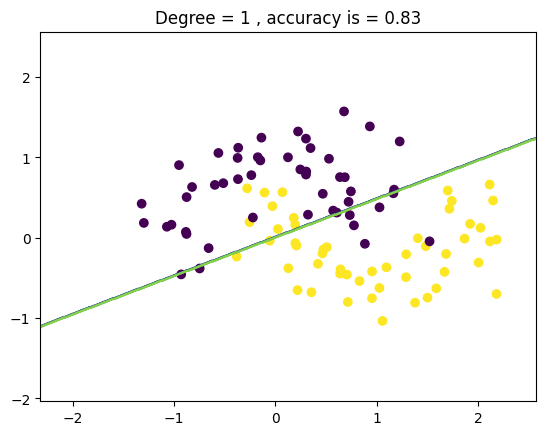

In [85]:
plot_decision_regions(x,y)

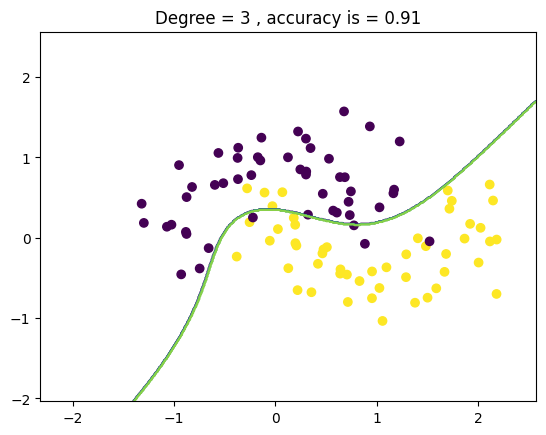

In [86]:
plot_decision_regions(x,y,degree = 3)